# NYC Restaurants


First, we load the data and read the values as strings

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)

In [3]:
df.columns

Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [4]:
df.iloc[0]

Unnamed: 0                                                               0
CAMIS                                                             30112340
DBA                                                                WENDY'S
BORO                                                              BROOKLYN
BUILDING                                                               469
STREET                                                     FLATBUSH AVENUE
ZIPCODE                                                              11225
PHONE                                                           7182875005
CUISINE DESCRIPTION                                             Hamburgers
INSPECTION DATE                                                 12/30/2014
ACTION                     Violations were cited in the following area(s).
VIOLATION CODE                                                         06C
VIOLATION DESCRIPTION    Food not protected from potential source of co...
CRITICAL FLAG            

### Creating a unique name for each restaurant 
On the
DataFrame created above, we add a new column to your DataFrame, called
’RESTAURANT’, that combines DBA, BUILDING, STREET, ZIPCODE,
and BORO fields. <br>For example, “WENDY’S 469 FLATBUSH AVENUE
11225 BROOKLYN”. Then, we print the first 10 values of the RESTAURANT column
of the DataFrame.

In [5]:
## Create a new column and concatenate the field values
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE'] + ' ' + df['BORO']

In [6]:
df['RESTAURANT'].iloc[:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

### Checking how many restaurants are included in the data
Note:
• A “Subway” in one particular address (i.e., building, street, zipcode,
and boro) counts as one restaurant; don’t combine all Subways into
one restaurant!
• The data can have multiple violations for the same restaurant!

In [7]:
## Calculate the length of unique() values under 'RESTAURANTS'
restaurants = len(df['RESTAURANT'].unique())
print(f'Total number of restaurants in NYC: {restaurants}')

Total number of restaurants in NYC: 10114


### Calculating number of chains
Let us define a chain to be
the same restaurant name occurring in at least two different (building, street,
zipcode, boro) addresses (i.e., one DBA with multiple restaurant locations).

In [8]:
## Calculate the number of DBA values in NYC with atleast 2 restaurant addresses
chains = (df[['DBA','RESTAURANT']].dropna(how='any').drop_duplicates()['DBA'].value_counts()>=2).sum()
print(f'Total number of restaurant chains in NYC: {chains}')

Total number of restaurant chains in NYC: 368


### Plotting a bar graph of the top 20 most popular chains.
We already have the chains from the previous problem. Here, we count the number
of restaurants for each chain as a measure of its popularity.

<AxesSubplot:>

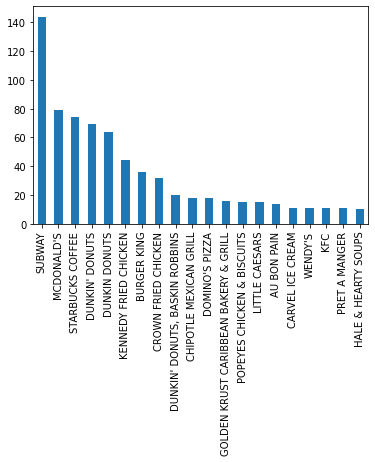

In [9]:
## Plot the graph of top 20 restaurant chains with maximum restaurant outlets
popular = df[['DBA','RESTAURANT']].dropna(how='any').drop_duplicates()['DBA'].value_counts()
popular[:20].plot(kind='bar')

### Calculating the fraction of all restaurants that are chain restaurants
A restaurant is considered as being one restaurant at one
location. So “Wendy’s 5th Street” and “Wendy’s on 10th Street” are two
different restaurants.

In [10]:
restaurants

10114

In [11]:
## Create a dataframe of unique restaurants
unique_restaurants_df = df.drop_duplicates(subset=['RESTAURANT'])
unique_restaurants_df.head(2)

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5,5,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS


In [12]:
rest_in_chains = df[['DBA','RESTAURANT']].dropna(how='any').drop_duplicates()['DBA'].value_counts()>=2
rest_in_chains[rest_in_chains].index.values

array(['SUBWAY', "MCDONALD'S", 'STARBUCKS COFFEE', "DUNKIN' DONUTS",
       'DUNKIN DONUTS', 'KENNEDY FRIED CHICKEN', 'BURGER KING',
       'CROWN FRIED CHICKEN', "DUNKIN' DONUTS, BASKIN ROBBINS",
       'CHIPOTLE MEXICAN GRILL', "DOMINO'S PIZZA",
       'GOLDEN KRUST CARIBBEAN BAKERY & GRILL',
       'POPEYES CHICKEN & BISCUITS', 'LITTLE CAESARS', 'AU BON PAIN',
       'CARVEL ICE CREAM', "WENDY'S", 'KFC', 'PRET A MANGER',
       'HALE & HEARTY SOUPS', 'PRONTO PIZZA', 'CHECKERS',
       'LE PAIN QUOTIDIEN', 'BLIMPIE', "PAPA JOHN'S", 'PANERA BREAD',
       'DUNKIN DONUTS/BASKIN ROBBINS', 'EUROPA CAFE', '2 BROS PIZZA',
       'KENTUCKY FRIED CHICKEN', 'DUNKIN DONUTS & BASKIN ROBBINS',
       'TACO BELL', 'BOSTON MARKET', 'MCDONALDS', 'TBAAR',
       'FIVE GUYS BURGERS AND FRIES', 'WHITE CASTLE', 'Dunkin Donuts',
       'GOLDEN KRUST', 'JUST SALAD', "XI'AN FAMOUS FOODS", 'CAFFE BENE',
       'DUNKIN DONUTS BASKIN ROBBINS', 'FIKA', 'Subway',
       'NO. 1 CHINESE RESTAURANT', "DUNKIN' DON

In [13]:
def f(string):
    '''
    A function to check if the DBA value is one of the chain restaurants
    
    Parameters: 
    string (str): A string with name of restaurant
    
    Returns:
    True if 'DBA' is one of the restaurant names in chain restaurants
    False, otherwise
    '''
    
    if string in rest_in_chains[rest_in_chains].index.values:
        return True
    else:
        return False

mask = unique_restaurants_df['DBA'].map(f)

In [14]:
mask

0         True
5        False
9        False
16       False
22       False
         ...  
44621    False
44622    False
44627    False
44628    False
44629    False
Name: DBA, Length: 10114, dtype: bool

In [15]:
## Calculate the number of restaurants part of chain restaurants
restaurants_in_chain = mask.value_counts()[True]
print(f'Total number of restaurants belonging to chains: {restaurants_in_chain}')

Total number of restaurants belonging to chains: 1666


In [16]:
print(f'Fraction of restaurants belonging to chains: {restaurants_in_chain  / restaurants}')

Fraction of restaurants belonging to chains: 0.16472216729286138


### Plotting the number of non-chain restaurants in each boro. 
First, we need to figure out all the non-chain restaurants, then select
out only those restaurants, and finally plot the number of such restaurants
by boro. 

In [17]:
## Calculate the number of restaurants not part of chain restaurants
restaurants_not_in_chain = mask.value_counts()[False]
print(f'Total number of restaurants not belonging to chains: {restaurants_not_in_chain}')

Total number of restaurants not belonging to chains: 8448


In [18]:
## Count the number of non-chain restaurants in each borough
non_chain_rest = unique_restaurants_df[~mask]['BORO'].dropna(how='any').value_counts()
non_chain_rest

MANHATTAN        3323
BROOKLYN         2180
QUEENS           1968
BRONX             659
STATEN ISLAND     312
Missing             6
Name: BORO, dtype: int64

<AxesSubplot:>

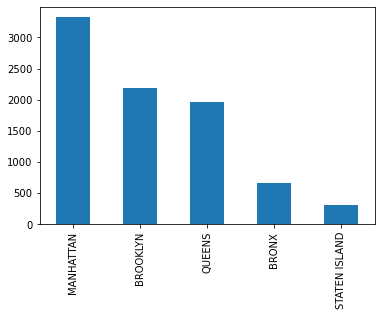

In [19]:
## Plot only top 5 boroughs, thus excluding 'Missing', and the corresponding non-chain restaurant counts for these boroughs
non_chain_rest[:5].plot(kind='bar')

### Plotting the fraction of non-chain restaurants in each boro. 
The boro with the most non-chain restaurants might just be the
boro with the most restaurants in general. 
<br> If we want to find the boro that
attracts the most “independent” restauranteurs, we must divide the number
of non-chain restaurants by the total number of restaurants in the boro. Plot
this.<br>

<b>INFERENCE:</b><br> The absolute number of non-chain restaurants in Manhattan is highest with 3323 independent restaurants, however, the highest ratio of non-chain restaurants is in Brooklyn with a value of 0.862 and Manhattan has the third highest ratio of 0.83

In [20]:
## Calculate the total number of restaurants in each borough
total_rest = unique_restaurants_df['BORO'].dropna(how='any').value_counts()
total_rest

MANHATTAN        4001
BROOKLYN         2529
QUEENS           2321
BRONX             855
STATEN ISLAND     394
Missing            14
Name: BORO, dtype: int64

In [21]:
## Calculate the fraction of non-chain restaurants to total restaurants in each borough
frac_non_chain = non_chain_rest/total_rest
frac_non_chain

MANHATTAN        0.830542
BROOKLYN         0.862001
QUEENS           0.847910
BRONX            0.770760
STATEN ISLAND    0.791878
Missing          0.428571
Name: BORO, dtype: float64

<AxesSubplot:>

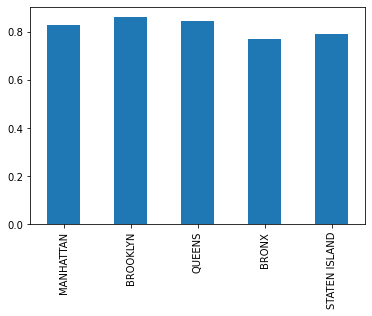

In [22]:
## Plot the fraction of non-chain restaurants in all boroughs, except 'Missing'
frac_non_chain[:5].plot(kind='bar')

### Plotting the popularity of cuisines. 
Plotting the cuisines that are
the most well-represented among all restaurants? Here, we define the popularity of a
cuisine as the number of restaurants serving that cuisine. <br> Then, we plot the popularity
of the top 20 cuisines.


<b>INFERENCE: </b><br> The American cuisine is the most well represented among all restaurants, followed by Chinese and Cafe/Coffee/Teas.

In [23]:
## Identify the popular cuisines in NYC
popular_cuisines = unique_restaurants_df['CUISINE DESCRIPTION'].value_counts()
popular_cuisines

American              2238
Chinese               1098
Café/Coffee/Tea        498
Pizza                  482
Italian                451
                      ... 
Nuts/Confectionary       2
Scandinavian             2
Hawaiian                 1
Iranian                  1
Californian              1
Name: CUISINE DESCRIPTION, Length: 79, dtype: int64

<AxesSubplot:>

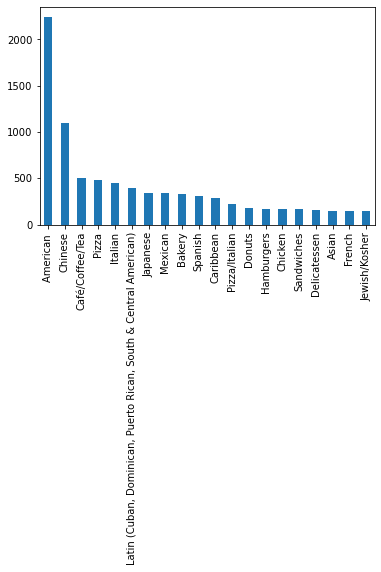

In [24]:
## Plot the top 20 popular cuisines
popular_cuisines[:20].plot(kind='bar')

### Plotting the cuisines among restaurants which never got cited for violations. 
First, we find the restaurants that were never cited for a code violation. Then, we
compute the popularity of each cuisine among these “clean” restaurants. <br>Finally, we plot
the popularity of the top-20 among these cuisines.

In [25]:
## Identify all restaurants that have atleast one violation
violation_rest = df[pd.notnull(df['VIOLATION CODE'])]['RESTAURANT'].unique()
print(f'Restaurants with atleast one violation: {len(violation_rest)}')

Restaurants with atleast one violation: 9873


In [26]:
def f(string):
    '''
    A function to identify restaurants that have never violated
    
    Parameters:
    string (str): Restaurant value
    
    Returns:
    False, if the string is part of the violated restaurants array
    True, if the string is not a part of the violated restaurants array
    '''
    
    if string in violation_rest:
        return False
    else:
        return True

mask = df['RESTAURANT'].map(f)

In [27]:
clean_rest = df[mask].drop_duplicates('RESTAURANT')
print(f'The total number of clean restaurants: {len(clean_rest)}')

The total number of clean restaurants: 241


In [28]:
## Calculate the count of cuisines in only these clean restaurants
clean_cuisines = clean_rest.drop_duplicates()['CUISINE DESCRIPTION'].value_counts()
clean_cuisines

American                                                            49
Chinese                                                             42
Café/Coffee/Tea                                                     14
Pizza                                                               11
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    10
Italian                                                             10
Japanese                                                             8
Spanish                                                              8
Bakery                                                               7
Other                                                                6
Asian                                                                6
Donuts                                                               5
Delicatessen                                                         5
French                                                               4
Thai  

<AxesSubplot:>

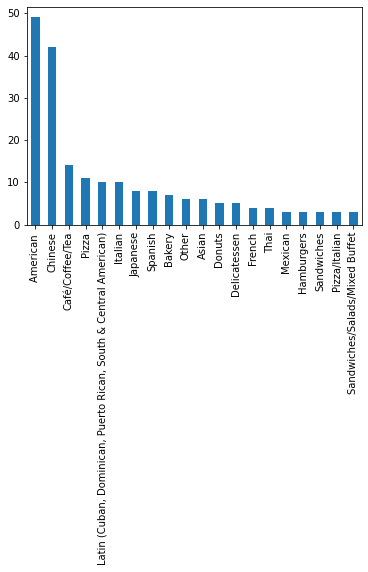

In [29]:
## Plot top 20 most popular cuisines from clean restaurants
clean_cuisines[:20].plot(kind='bar')

###  Identifying the cuisines tend to be the “cleanest”?
• First, we select all cuisines for which there were at least 20 restaurants representing that cuisine.<br>
• For each such cuisine, we compute the ratio of the counts in Q9 to Q8.<br>
This is the ratio of restaurants that never got cited, versus total number
of restaurants, for each cuisine.<br>
• Then, we find the top-10 cuisines with the highest ratios; these are that cuisines
whose restaurants are “most likely to be clean.”

In [30]:
## Identify cuisines with more than 20 restaurants serving them
mask = unique_restaurants_df['CUISINE DESCRIPTION'].value_counts()>=20
mask

American               True
Chinese                True
Café/Coffee/Tea        True
Pizza                  True
Italian                True
                      ...  
Nuts/Confectionary    False
Scandinavian          False
Hawaiian              False
Iranian               False
Californian           False
Name: CUISINE DESCRIPTION, Length: 79, dtype: bool

In [31]:
## Calculate the ratio of clean restaurants serving the cuisine to total restaurants serving the cuisine
## Sort the ratios in descending order 
most_likely_clean = pd.DataFrame(clean_cuisines[mask]/popular_cuisines[mask]).dropna().sort_values(by='CUISINE DESCRIPTION',ascending=False)
most_likely_clean

,CUISINE DESCRIPTION
Soul Food,0.090909
Vietnamese/Cambodian/Malaysia,0.062500
Other,0.058252
Soups & Sandwiches,0.047619
Continental,0.047619
Barbecue,0.047619
Asian,0.041096
Chinese,0.038251
Greek,0.036364
Peruvian,0.035714


In [32]:
## Plot the top 10 cuisines using ratio of clean restaurants to total restaurants
most_likely_clean[:10]

,CUISINE DESCRIPTION
Soul Food,0.090909
Vietnamese/Cambodian/Malaysia,0.062500
Other,0.058252
Soups & Sandwiches,0.047619
Continental,0.047619
Barbecue,0.047619
Asian,0.041096
Chinese,0.038251
Greek,0.036364
Peruvian,0.035714


### Identifying the most common violations in each borough? 
First, we create a table of the number of times each violation description
was observed in each borough, and figure out the most common violation
description for each borough.
To create the table, we use the crosstab function.Then, we find the most common
violation description for each borough.

In [33]:
## Create crosstab of violation code and borough
violation = pd.Categorical(df['VIOLATION DESCRIPTION'])
borough = pd.Categorical(df['BORO'])
boro_viol = pd.crosstab(violation, borough)
boro_viol

col_0,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND
row_0,,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",12,40,49,0,29,5
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,1,5,6,0,4,1
''''Wash hands sign not posted at hand wash facility.,21,57,93,1,60,8
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",5,12,19,0,24,3
Accurate thermometer not provided in refrigerated or hot holding equipment.,21,76,98,0,92,16
...,...,...,...,...,...,...
Toilet facility not provided for employees or for patrons when required.,2,3,11,0,3,1
Toilet facility used by women does not have at least one covered garbage receptacle.,1,5,7,0,2,1
"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",2,8,15,0,20,3


In [34]:
## Identify most common violation codes in each borough
boro_viol.idxmax()

col_0
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
Missing          Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

### Identifying the most common violations per borough, after normalizing for the relative abundance of each violation
A better
approach to the above would be to normalize the violation counts, as follows.<br>
• Get overall frequencies: Figure out how common each violation is, over
the entire dataset; let’s call this violationFrequency.<br>
• Normalize: Consider the table of number of violations by boro that
we created for the previous question. For each borough, we divide the
number of violations of each type by the total number of violations for
that type; i.e., divide the series of violations by violationFrequency.
We want to do this for each borough.<br>
• Then, we find the biggest violations: Now, after this normalization, for each
borough, we figure out the most common violation description.

In [35]:
## Calculate total count of violation codes irrespective of borough
boro_viol.columns = boro_viol.columns.add_categories(['violationFrequency'])
boro_viol['violationFrequency'] = boro_viol.sum(axis = 1)
print (boro_viol)

col_0                                               BRONX  BROOKLYN  \
row_0                                                                 
Choking first aid poster not posted. Alcohol...     12        40   
''''No Smoking and/or 'Smoking Permitted sign...      1         5   
''''Wash hands sign not posted at hand wash fa...     21        57   
A food containing artificial trans fat, with 0....      5        12   
Accurate thermometer not provided in refrigerat...     21        76   
...                                                   ...       ...   
Toilet facility not provided for employees or f...      2         3   
Toilet facility used by women does not have at ...      1         5   
Toxic chemical improperly labeled, stored or us...      2         8   
Unprotected food re-served.                             1         0   
Wiping cloths soiled or not stored in sanitizin...     47       198   

col_0                                               MANHATTAN  Missing  \
ro

In [36]:
## Use crosstab with normalize function parameter to normalize the values 
violation = pd.Categorical(df['VIOLATION DESCRIPTION'])
borough = pd.Categorical(df['BORO'])
boro_viol = pd.crosstab(violation, borough, normalize='index')
boro_viol

col_0,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND
row_0,,,,,,
"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",0.088889,0.296296,0.362963,0.000000,0.214815,0.037037
''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,0.058824,0.294118,0.352941,0.000000,0.235294,0.058824
''''Wash hands sign not posted at hand wash facility.,0.087500,0.237500,0.387500,0.004167,0.250000,0.033333
"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",0.079365,0.190476,0.301587,0.000000,0.380952,0.047619
Accurate thermometer not provided in refrigerated or hot holding equipment.,0.069307,0.250825,0.323432,0.000000,0.303630,0.052805
...,...,...,...,...,...,...
Toilet facility not provided for employees or for patrons when required.,0.100000,0.150000,0.550000,0.000000,0.150000,0.050000
Toilet facility used by women does not have at least one covered garbage receptacle.,0.062500,0.312500,0.437500,0.000000,0.125000,0.062500
"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",0.041667,0.166667,0.312500,0.000000,0.416667,0.062500


In [37]:
## Identify the most common violation code in each borough using these normalized values
boro_viol.idxmax()

col_0
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
Missing          ''''Wash hands sign not posted at hand wash f...
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

In [38]:
df[df['VIOLATION DESCRIPTION']=='Out-of package sale of tobacco products observed.']

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT
20817,20817,41529962,EUROS EL TINA RESTAURANT LOUNGE AND BILLIARDS,MANHATTAN,500,WEST 207 STREET ...,10034,2123049810,"Latin (Cuban, Dominican, Puerto Rican, South &...",11/28/2014,Violations were cited in the following area(s).,15E,Out-of package sale of tobacco products observed.,Not Critical,NaN,NaN,NaN,02/12/2015,Smoke-Free Air Act / Initial Inspection,EUROS EL TINA RESTAURANT LOUNGE AND BILLIARDS ...
21403,21403,41546006,JUNIOR'S TACOS,MANHATTAN,253257,SHERMAN AVENUE,10034,2129427202,Mexican,11/28/2014,Violations were cited in the following area(s).,15E,Out-of package sale of tobacco products observed.,Not Critical,NaN,NaN,NaN,02/12/2015,Smoke-Free Air Act / Initial Inspection,JUNIOR'S TACOS 253257 SHERMAN AVENUE 10034 MAN...


### How many phone area codes correspond to a singlezipcode? 
The first three digits of the restaurant phone numbers are their
area codes. The area codes do not generally align with zip codes, but some
area codes are only for a single zip code. Here, we figure out how many area
codes have this property.<br>

In [39]:
## Extract area code from phone number
df['AREA CODE'] = df['PHONE'].str[:3]
df['AREA CODE']

0        718
1        718
2        718
3        718
4        718
        ... 
44628    917
44629    212
44630    212
44631    212
44632    212
Name: AREA CODE, Length: 44633, dtype: object

In [40]:
## Count the number of unique area codes attached to a zipcode using nunique()
df.groupby(['AREA CODE'])['ZIPCODE'].nunique()

AREA CODE
000      1
171      1
175      1
191      1
201     11
202      1
206      1
212     65
215      4
270      2
281      1
303      1
305      1
347    130
404      1
407      2
410      1
412      1
434      1
502      1
505      1
516     21
570      1
605      1
607      1
610      1
612      1
615      1
617      1
626      1
631      3
646     95
702      1
703      2
716      1
718    151
728      1
732      5
813      2
845      3
848      2
855      1
860      1
862      2
877      3
905      1
908      1
914      9
917    117
929     15
954      1
964      1
970      1
973      2
985      1
___      7
Name: ZIPCODE, dtype: int64

In [41]:
## Count the number of zipcodes for which only 1 unique area code is attached
unique_zip_area = (df.groupby(['AREA CODE'])['ZIPCODE'].nunique()==1).value_counts()[True]
print(f'Number of area codes which are attached to only one zip code: {unique_zip_area}')

Number of area codes which are attached to only one zip code: 34


### Finding some common misspellings of street names
Sometimes, it’s Avenue, and sometimes, it’s Ave. We will try to come up with an
automated way to find common misspellings. The idea is the following: if
Ave and Avenue are the same, they should show up often in similar-sounding
street names, e.g., Lexington Ave and Lexington Avenue, using the following approach:<br>
• Create a new column, called STREET TYPE, which is the the last word
in the name of the street. For example, if the street is “Astoria Boulevard”, the street type should be “Boulevard”.<br>
• Create another column, called STREET BASE, which contains everything
but the last word in the name of the street. For example, if the street
is “Astoria Boulevard”, the street base should be “Astoria”.<br>• Create a third column, called STREET BASE & ZIP, that combines the
street base and the zipcode.<br>
• Create a table containing just these three columns, and remove any
duplicates or instances where street base is empty. This table now
contains unique street names, along with the street type.<br>
• Merge this table with itself, on the STREET BASE & ZIP column. Thus,
in the new merged tabled, we will have two STREET TYPE fields for
each street base and zipcode. For example, if both Lexington Ave and
Lexington Avenue exist in the same zipcode, we will get a row for the
street base Lexington and the two street types Ave and Avenue.<br>
• From the merged table, select only the rows where the street types are
different.<br>
• Now, do a cross-tabulation of the two distinct street types (check out
the crosstab function in Pandas). This gives us the number of times
Ave and Avenue were used with the same STREET BASE & ZIP.<br>
• From this cross-tabulation table, find the most commonly street type
that occurs with each of the following: AVE, ST, RD, PL, BOULEARD,
and BULEVARD<br>

In [42]:
## Create a column 'STREET TYPE' using str.split() on " " delimiter and select the last word as the value for this column<
df['STREET TYPE'] = df['STREET'].str.split().str[-1]
df.head(2)

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,...,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT,AREA CODE,STREET TYPE
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE


In [43]:
## Create a column 'STREET BASE' using str.split() on " " delimiter and 
## select everything but the last word and concatenate the list elements into a string
df['STREET BASE'] = df['STREET'].str.split().str[:-1]
df['STREET BASE'] = [' '.join(map(str, l)) for l in df['STREET BASE']]
df.head(2)

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,...,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT,AREA CODE,STREET TYPE,STREET BASE
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE,FLATBUSH
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN,718,AVENUE,FLATBUSH


In [44]:
## Create a column 'STREET BASE & ZIP' by concatenating the 'STREET BASE' and 'ZIPCODE' column values using '+' 
df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' +df['ZIPCODE']

In [45]:
df.iloc[44618][['STREET TYPE','STREET BASE','STREET BASE & ZIP']]

STREET TYPE                  AVE
STREET BASE                GRAND
STREET BASE & ZIP    GRAND 11378
Name: 44618, dtype: object

In [46]:
## Create a dataframe called street using only 'STREET TYPE','STREET BASE','STREET BASE & ZIP' columns and drop all duplicates
street = df[['STREET TYPE','STREET BASE','STREET BASE & ZIP']].drop_duplicates().dropna(subset=['STREET BASE'])

In [47]:
street

,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,AVENUE,FLATBUSH,FLATBUSH 11225
5,ROAD,63,63 11374
9,BOULEVARD,ASTORIA,ASTORIA 11369
16,AVENUE,SUTTER,SUTTER 11208
22,HIGHWAY,KINGS,KINGS 11223
...,...,...,...
44613,ST,9TH,9TH 11101
44617,AVE,ROGERS,ROGERS 11216
44618,AVE,GRAND,GRAND 11378
44619,ST,E 48TH,E 48TH 10017


In [48]:
## Merge this table with itself using merge() on 'STREET BASE & ZIP' column
street_merge = street.merge(street, 
                            left_on='STREET BASE & ZIP',
                            right_on='STREET BASE & ZIP',
                            suffixes=['_street1','_street2'])
##suffixes for columns that have same name to distingush between the names

In [49]:
street_merge

,STREET TYPE_street1,STREET BASE_street1,STREET BASE & ZIP,STREET TYPE_street2,STREET BASE_street2
0,AVENUE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
1,AVENUE,FLATBUSH,FLATBUSH 11225,AVE,FLATBUSH
2,AVE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
3,AVE,FLATBUSH,FLATBUSH 11225,AVE,FLATBUSH
4,ROAD,63,63 11374,ROAD,63
...,...,...,...,...,...
3703,AVE,GREENE,GREENE 11216,AVE,GREENE
3704,ST,9TH,9TH 11101,ST,9TH
3705,AVE,ROGERS,ROGERS 11216,AVE,ROGERS
3706,ST,E 48TH,E 48TH 10017,ST,E 48TH


In [50]:
## Pick only the rows where 'STREET TYPE' of first table is != 'STREET TYPE' from second table
street_merge = street_merge[street_merge['STREET TYPE_street1']!=street_merge['STREET TYPE_street2']]
street_merge

,STREET TYPE_street1,STREET BASE_street1,STREET BASE & ZIP,STREET TYPE_street2,STREET BASE_street2
1,AVENUE,FLATBUSH,FLATBUSH 11225,AVE,FLATBUSH
2,AVE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
5,ROAD,63,63 11374,DRIVE,63
6,DRIVE,63,63 11374,ROAD,63
12,AVENUE,CHURCH,CHURCH 11218,AVE,CHURCH
...,...,...,...,...,...
3338,AVENUE,PATCHEN,PATCHEN 11233,AVE,PATCHEN
3424,STREET,48,48 11101,AVENUE,48
3425,AVENUE,48,48 11101,STREET,48
3475,PARKWAY,HUTCHINSON RIVER,HUTCHINSON RIVER 10465,PKWY,HUTCHINSON RIVER


In [51]:
##  Create a crosstab for the 'STREET TYPE' column of both tables
st = pd.crosstab(index=street_merge['STREET TYPE_street1'], columns=street_merge['STREET TYPE_street2'])
st

STREET TYPE_street2,A,AAVENUE,AIRPOR,AIRPORT,AVE,AVENUE,AVEUE,B,BLVD,BOULEARD,...,TERM8-A1,TERMINAL,TPKE,TURNPIKE,U,V,W,WEST,X,Z
STREET TYPE_street1,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
AAVENUE,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIRPOR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIRPORT,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVE,0,1,0,0,0,163,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
WEST,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [52]:
for st_type in ['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']:
    print (f'Most common street type for {st_type}: {st[st_type].idxmax()}')

Most common street type for AVE: AVENUE
Most common street type for ST: STREET
Most common street type for RD: ROAD
Most common street type for PL: PLACE
Most common street type for BOULEARD: BLVD
Most common street type for BULEVARD: BLVD


# END OF CODE